#  Visualisations des accidents

Ce notebook regroupe toutes les visualisations importantes permettant de comprendre :
- la répartition géographique des accidents,
- l’évolution temporelle,
- l’impact des conditions météo,
- les périodes les plus dangereuses,
- les relations entre gravité et variables expliquant l’accident.


# Importation des bibleothèques

In [3]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from src.data_prep import load_data, save_clean_data

In [4]:
df = load_data('../data/processed/US_Accidents_clean.csv')

Données chargées : 7728394 lignes, 36 colonnes


In [5]:
print(df.columns.tolist())

['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County', 'State', 'Country', 'Timezone', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']


# Accidents à proximité d''aménagements publics (écoles, hôpitaux, etc.)

/var/folders/r8/k96sg_qj0hl_sng_4mxjv1cw0000gn/T/ipykernel_14221/4146908707.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Amenity', palette='coolwarm')


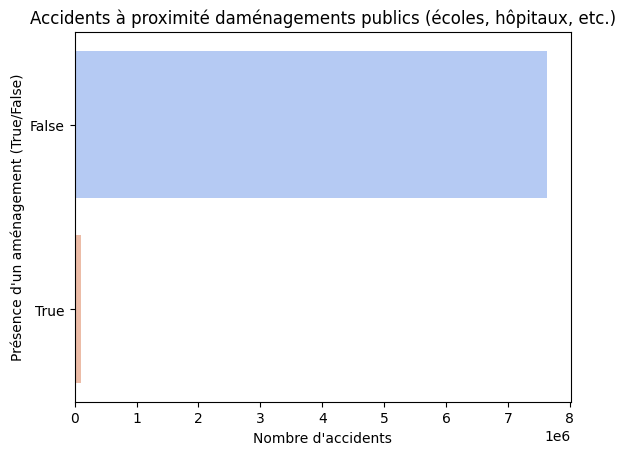

In [6]:
sns.countplot(data=df, y='Amenity', palette='coolwarm')
plt.title('Accidents à proximité d''aménagements publics (écoles, hôpitaux, etc.)')
plt.ylabel("Présence d'un aménagement (True/False)")
plt.xlabel("Nombre d'accidents")
plt.show()

##  Accidents par État

Visualisation du nombre total d'accidents par État aux États-Unis.


/var/folders/r8/k96sg_qj0hl_sng_4mxjv1cw0000gn/T/ipykernel_14221/2866487759.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_severity.values, y=state_severity.index, palette='mako')


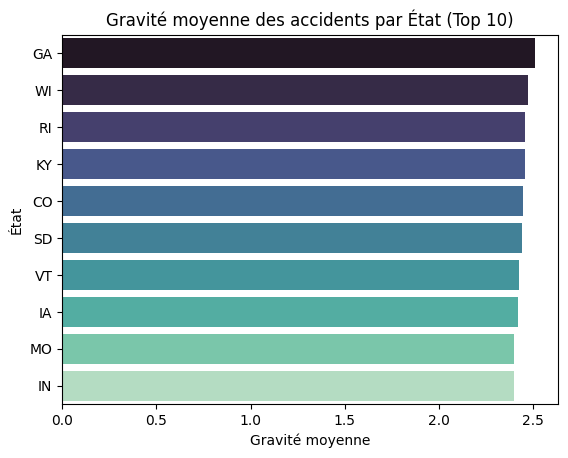

In [8]:
state_severity = df.groupby('State')['Severity'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=state_severity.values, y=state_severity.index, palette='mako')
plt.title("Gravité moyenne des accidents par État (Top 10)")
plt.xlabel("Gravité moyenne")
plt.ylabel("État")
plt.savefig('../outputs/graphs/top10_states.png', dpi=300, bbox_inches='tight')
plt.show()

##  Impact de la météo

Analyse visuelle de l'influence des conditions météo sur :
- la fréquence des accidents
- la gravité


/var/folders/r8/k96sg_qj0hl_sng_4mxjv1cw0000gn/T/ipykernel_25693/2249677050.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_weather.values, y=avg_weather.index, palette='viridis')


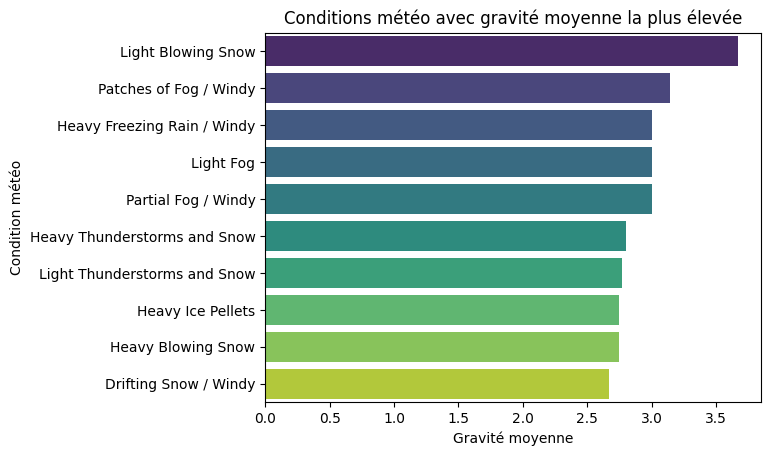

In [16]:
avg_weather = df.groupby('Weather_Condition')['Severity'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_weather.values, y=avg_weather.index, palette='viridis')
plt.title("Conditions météo avec gravité moyenne la plus élevée")
plt.xlabel("Gravité moyenne")
plt.ylabel("Condition météo")
plt.show()

In [7]:
import folium
sample_df = df.sample(5000)
m = folium.Map(location=[sample_df['Start_Lat'].mean(), sample_df['Start_Lng'].mean()], zoom_start=4)
for _, row in sample_df.iterrows():
    folium.CircleMarker(
        location=[row['Start_Lat'], row['Start_Lng']],
        radius=2,
        color='red' if row['Severity'] >= 3 else 'orange',
        fill=True
    ).add_to(m)
m.save('../outputs/graphs/map_accidents.html')